In [1]:
import os 
import tarfile
import urllib

### **Downloading Data**

In [2]:
root = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/' # dataset url
path = os.path.join('datasets', 'housing')  # naming and joining two folders
url = root + 'datasets/housing/housing.tgz'

def fetch_data(data_url = url, data_path = path):
    os.makedirs(path, exist_ok = True)
    tgz_path = os.path.join(data_path, 'housing.tgz')
    urllib.request.urlretrieve(data_url, tgz_path)
    data_tgz = tarfile.open(tgz_path)
    data_tgz.extractall(path = path)
    data_tgz.close()
    
fetch_data()

### **Understanding Data**

In [3]:
# For loading data
import pandas as pd

def load_data(data_path = path):
    csv_path = os.path.join(data_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [4]:
housing = load_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# info() method is used to get quick description of data specifically if we have null values
# objects can hold any kind of value
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# describe method shows a summry of numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# value counts gave number assosiated with each category
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

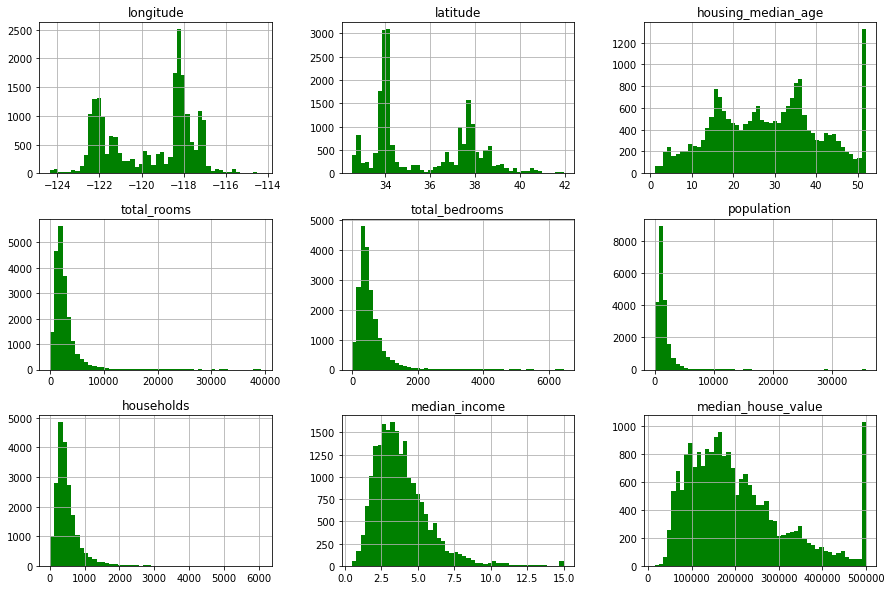

In [8]:
# Understanding data via histogram
# histogram give us information regarding range of data 
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins = 50, color = 'green',figsize = (15, 10))
plt.show()

 #### Understanding information giving in the histogram
 
 1. Median income is not expressed in US Dollars, Scaled at 15 - 0.5, 3 means above 30,000
 2. All attributes have different scale
 3. heavy tailed distribution are difficult for MC algo to detect patters (try to convert them in bell-shaped curve)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


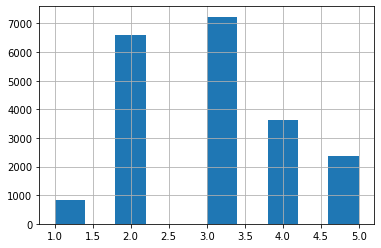

In [9]:
import numpy as np


housing['income_cat'] = pd.cut(housing['median_income'], bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels = [1,2,3,4,5] )
print(housing['income_cat'].value_counts()/len(housing))
housing['income_cat'].hist();

### **Creating Test Set**

If we estimate gernalization error (measure of how accurately an algorithm is able to predict outcome values for previously unseen data) using a test set, our estimate will be too optimistic and led to launch a system that will not perform as well as expected.

In [10]:
# Method 1

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[: test_size]
    train_indices = shuffled_indices[test_size :]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.15)

In [12]:
print(len(train_set))
print(len(test_set))

17544
3096


In [13]:
# Method 2
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.15, random_state = 20)

In [14]:
print(len(train_set))
print(len(test_set))

17544
3096


### **Stratified Sampling**

In stratified sampling the population is divided into homogenous subgroups called strata, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population

It is important to have a sufficient number of instances in your dataset for each stratum or else the estimate of a stratum's importance may be biased. This means that you should should not have too many stratas and each stratum should be large enough

In [15]:
# stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 2, test_size = 0.15, random_state = 12)  # n_splits give number of test and train sets 
                                                                                   # nsplits will give 2 train set and 2 test set
for train_ix, test_ix in split.split(housing, housing['income_cat']):# housing[income] on which the stratums are made
    print("TRAIN:", train_ix, "TEST:", test_ix)

TRAIN: [11568 11140   811 ... 11219 16531  3484] TEST: [16955 17243 14276 ...  9452  1852 10365]
TRAIN: [17519 10935 17989 ... 11473 12250  9955] TEST: [10373 17137 15509 ...  5512  8042 18406]


In [16]:
for train_ix, test_ix in split.split(housing, housing['income_cat']):
    strat_train = housing.loc[train_ix]
    strat_test = housing.loc[test_ix]

In [17]:
# Sampling error without stratification

sampling_df = pd.DataFrame({ 'Overall': housing['income_cat'].value_counts()/len(housing),
                             'Stratified': strat_train['income_cat'].value_counts()/len(housing),
                             'Random': test_set['income_cat'].value_counts()/len(housing)})
sampling_df['Random Error'] = sampling_df['Overall'] - sampling_df['Random']
sampling_df['Stratified Error'] = sampling_df['Overall'] - sampling_df['Stratified']
sampling_df

,Overall,Stratified,Random,Random Error,Stratified Error
3,0.350581,0.297965,0.053004,0.297578,0.052616
2,0.318847,0.271027,0.048643,0.270203,0.047820
4,0.176308,0.149855,0.026211,0.150097,0.026453
5,0.114438,0.097287,0.016570,0.097868,0.017151
1,0.039826,0.033866,0.005572,0.034254,0.005959


In [18]:
# dropping income_cat from the stratified samples
for set_ in (strat_train, strat_test):
    set_.drop('income_cat', axis = 1, inplace = True)

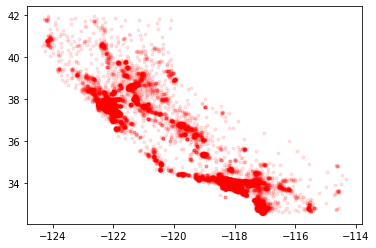

In [19]:
plt.scatter(x = housing['longitude'], y = housing['latitude'], alpha = 0.1, color = 'red', marker = '.');

### **Visualizing Data**

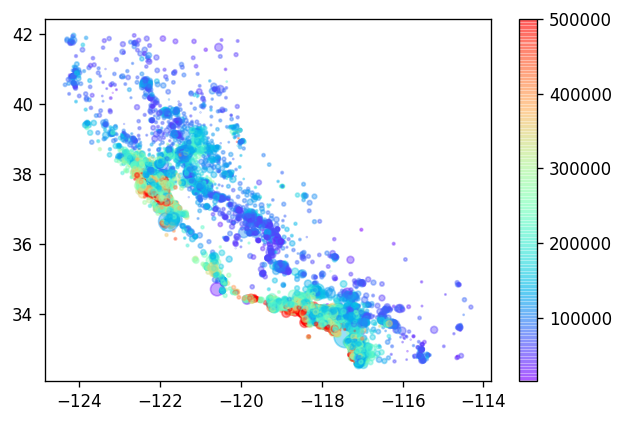

In [20]:
# making a copy of training data so that we dont harm the training data
housing = strat_train.copy()
fig = plt.figure(dpi = 120)
plt.scatter( x = housing['longitude'], y = housing['latitude'], alpha = 0.4,
             s = housing['population']/200, c = housing["median_house_value"], cmap = 'rainbow')
plt.colorbar();

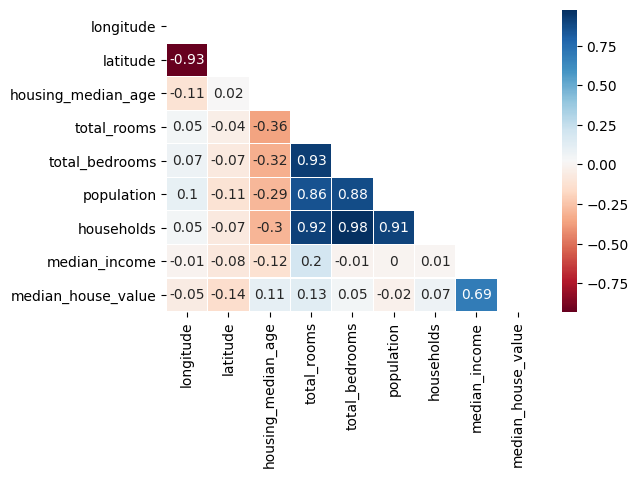

In [21]:
import seaborn as sns

# correlation between different attributes
# correlation only measures linear relationships
corr_matrix = np. round(housing.corr(), decimals = 2)
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(dpi = 100)
sns.heatmap(corr_matrix, mask = mask ,annot=True, linewidth = 0.1, cmap = 'RdBu');       

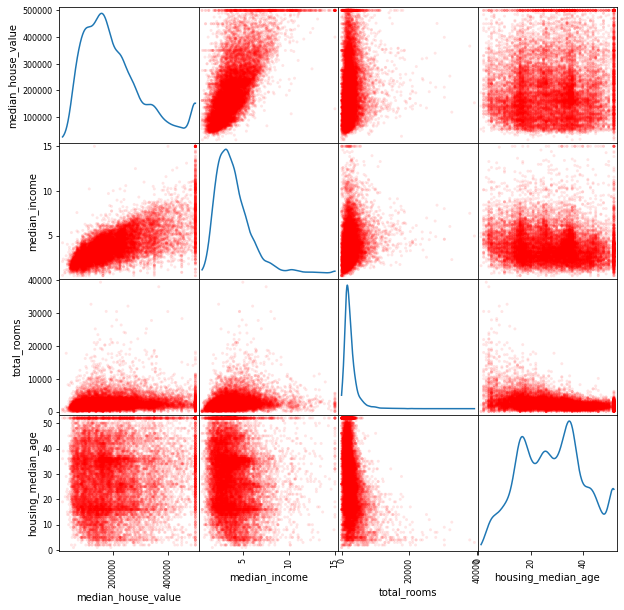

In [22]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], color = 'red', figsize = (10,10), alpha = 0.1, diagonal = 'kde');

1. The price cap that we noticed earlier is clearly visible as a horizontal line at 500,000
2. Try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks

### **Attribute Combination**

In [23]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17519,-121.91,37.33,28.0,454.0,147.0,366.0,140.0,2.9853,187500.0,<1H OCEAN,3.242857,0.323789,2.614286
10935,-117.90,33.74,25.0,808.0,163.0,1066.0,189.0,4.7679,173100.0,<1H OCEAN,4.275132,0.201733,5.640212
17989,-121.95,37.27,17.0,1330.0,271.0,408.0,258.0,1.7171,181300.0,<1H OCEAN,5.155039,0.203759,1.581395


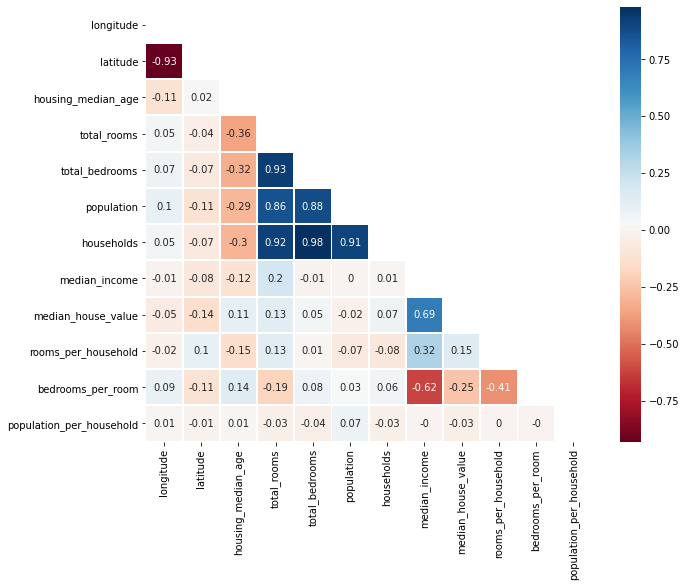

In [24]:
corr_matrix = np. round(housing.corr(), decimals = 2)
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, mask = mask ,annot=True, linewidth = 0.9, cmap = 'RdBu');

### **Seperating the target variable and independent variable**

In [25]:
housing = strat_train.drop('median_house_value', axis = 1)
housing_labels = strat_train['median_house_value'].copy()

### **Data Cleaning**

In [26]:
# need to replace missing values in the test set
# use Imputer to fill the missing values
# replace the na values with column mean median or mode
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis = 1)

# fit calculates the median for each column
imputer.fit(housing_num)
print('Column wise median')
print(imputer.statistics_)

# transfor replaces the training set wby replacing missing values
X = imputer.transform(housing_num)
X # is an array

Column wise median
[-118.49     34.25     29.     2127.      434.     1167.      409.
    3.5388]


array([[-1.2191e+02,  3.7330e+01,  2.8000e+01, ...,  3.6600e+02,
         1.4000e+02,  2.9853e+00],
       [-1.1790e+02,  3.3740e+01,  2.5000e+01, ...,  1.0660e+03,
         1.8900e+02,  4.7679e+00],
       [-1.2195e+02,  3.7270e+01,  1.7000e+01, ...,  4.0800e+02,
         2.5800e+02,  1.7171e+00],
       ...,
       [-1.1799e+02,  3.3710e+01,  1.8000e+01, ...,  3.0310e+03,
         5.7700e+02,  2.7614e+00],
       [-1.1698e+02,  3.3770e+01,  1.2000e+01, ...,  2.7110e+03,
         1.1180e+03,  1.9707e+00],
       [-1.2218e+02,  3.8350e+01,  2.4000e+01, ...,  1.7500e+02,
         6.1000e+01,  6.0266e+00]])

In [27]:
# converting the data again into pandas DF
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17519,-121.91,37.33,28.0,454.0,147.0,366.0,140.0,2.9853
10935,-117.90,33.74,25.0,808.0,163.0,1066.0,189.0,4.7679
17989,-121.95,37.27,17.0,1330.0,271.0,408.0,258.0,1.7171
14329,-117.17,32.71,39.0,311.0,181.0,206.0,113.0,0.7685
3559,-118.58,34.24,26.0,3239.0,647.0,1529.0,590.0,3.2426


### **Categorical Attributes**

In [28]:
housing_cat = housing[['ocean_proximity']] # changing numpy shape from (17544, )  to (17544, 1)
housing_cat[:5]

,ocean_proximity
17519,<1H OCEAN
10935,<1H OCEAN
17989,<1H OCEAN
14329,NEAR OCEAN
3559,<1H OCEAN


In [29]:
# converting categorical attributes to number
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:5]

array([[0.],
       [0.],
       [0.],
       [4.],
       [0.]])

This representation of ML algorithm will assume that two nearby values are more similiar than two distant values. This may be fine in some cases (eg. average, good, excellent) but not valid here

Here we use the concept of one hot encoding. The new attributes are sometimes called dummy attributes. The output is a SciPy sparse matrix instead of Numpy. It helps to save memory

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_hot = cat_encoder.fit_transform(housing_cat)
housing_cat_hot

<17544x5 sparse matrix of type '<class 'numpy.float64'>'
	with 17544 stored elements in Compressed Sparse Row format>

In [31]:
# Coonverting it into a numpy array
housing_cat_hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [32]:
# Listing the categories
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### **Custome Transformers**

Building custom attribute class in order to control the number of attributes

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix , bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):  # no *args or *kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix]/ X[:, households_ix]
        population_per_household = X[:, population_ix]/ X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/ X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.values)

In [34]:
housing_extra_attribs[1, :]  # when False

array([-117.9, 33.74, 25.0, 808.0, 163.0, 1066.0, 189.0, 4.7679,
       '<1H OCEAN', 4.275132275132275, 5.64021164021164,
       0.20173267326732675], dtype=object)

In [35]:
housing_extra_attribs[1, :] # when True

array([-117.9, 33.74, 25.0, 808.0, 163.0, 1066.0, 189.0, 4.7679,
       '<1H OCEAN', 4.275132275132275, 5.64021164021164,
       0.20173267326732675], dtype=object)

### **Feature Scaling**

Machine Learning algorithms don't perform well when the input numerical attributes have very different scales. Scaling the target values is generally not required. Min-max scaling (many people call this normalization) is the simplest: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min.

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean) and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (eg neural networks often except an input value ranging from 0 to 1). How ever a standardization is much less affected by outlier.

### **Tranformation Pipeline**

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')),
                         ('attrb_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())
                       ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [37]:
housing_num_tr

array([[-1.16754091,  0.7956682 , -0.04450541, ..., -0.86994677,
        -0.06523738,  1.68538596],
       [ 0.83174942, -0.88475302, -0.28216861, ..., -0.45817948,
         0.41892205, -0.18302614],
       [-1.18748395,  0.76758316, -0.91593716, ..., -0.10719097,
        -0.23050368, -0.15200135],
       ...,
       [ 0.78687757, -0.89879553, -0.83671609, ..., -0.78500301,
         0.35697202,  1.16616021],
       [ 1.29043947, -0.8707105 , -1.3120425 , ..., -0.08376166,
        -0.09554526,  0.1665154 ],
       [-1.30215647,  1.27311378, -0.36138968, ...,  0.49796651,
        -0.02450575, -0.71354248]])

All transformed except for ocean proximity. It is convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. Column transformer solves that problem 

In [38]:
# Combining all columns 
from sklearn.compose import ColumnTransformer

num_attrb = list(housing_num)
cat_attrb = ['ocean_proximity']
full_pipeline = ColumnTransformer([('num', num_pipeline, num_attrb),
                                   ('cat', OneHotEncoder(), cat_attrb)])

housing_prepared = full_pipeline.fit_transform(housing)

### **Selecting and Training Models**

In [39]:
# Linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
some_data = housing.iloc[:9]
some_labels = housing_labels.iloc[:9]
some_data_prepared = full_pipeline.transform(some_data)
pd.DataFrame({'Prediction': lin_reg.predict(some_data_prepared),
              'Labels': some_labels,
              'Difference': some_labels - lin_reg.predict(some_data_prepared) })

,Prediction,Labels,Difference
17519,208102.038604,187500.0,-20602.038604
10935,222218.026891,173100.0,-49118.026891
17989,150728.342029,181300.0,30571.657971
14329,166445.244947,187500.0,21054.755053
3559,206346.604953,236900.0,30553.395047
19736,245289.370490,106300.0,-138989.370490
3227,54893.086897,43100.0,-11793.086897
2665,56006.190908,60800.0,4793.809092
6254,199116.022544,152600.0,-46516.022544


In [40]:
# measuring root mean squared error
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67998.60974395854

In [41]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse # model badly overfits

0.0

In [91]:
# forest trees
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18422.93559985859

### **Cross Validation**

In [42]:
from sklearn.model_selection import cross_val_score

# tree mse
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores) # in cross validation the scoring is opposite of mse thats why added negative sign

In [47]:
def display_scores(scores):
    print('Scores', scores)
    print('Mean', scores.mean())
    print('SD', scores.std())

In [45]:
display_scores(tree_rmse_scores)

Scores [70735.60197786 71887.35421006 69732.33438382 69542.32047233
 67092.11865034 70518.49490484 68716.15644766 70002.93515294
 69257.11628438 68026.01167206]
Mean 69551.04441562938
SD 1311.110230859144


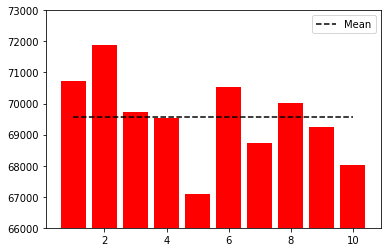

In [80]:
# error cross validation scores
plt.bar(np.arange(1,11),tree_rmse_scores, color = 'red')
plt.plot(np.arange(1,11), [tree_rmse_scores.mean()]*len(np.arange(1,11)), linestyle = '--', label = 'Mean', color = 'black')
plt.ylim(66000, 73000)
plt.legend();

In [81]:
# linear scores
lin_score = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_score = np.sqrt(- lin_score)

In [83]:
display_scores(lin_rmse_score)

Scores [69738.36687838 69829.95339844 70108.43816905 66252.76858021
 67460.89871747 69461.21281972 68947.48952825 68609.22143359
 66398.28123604 65604.01364577]
Mean 68241.06444069151
SD 1590.2443589821073


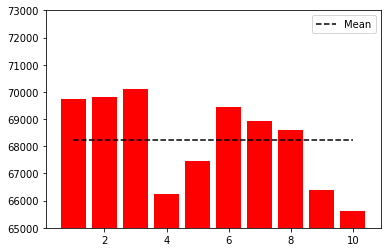

In [87]:
plt.bar(np.arange(1,11), lin_rmse_score, color = 'red')
plt.plot(np.arange(1,11), [lin_rmse_score.mean()]*len(np.arange(1,11)), linestyle = '--', label = 'Mean', color = 'black')
plt.ylim(65000, 73000)
plt.legend();

In [93]:
# forest scores
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_score = np.sqrt(- forest_scores)
display_scores(forest_rmse_score)

Scores [52866.28873352 50989.65340017 50225.51965154 48042.42666433
 48934.3787513  51864.87005688 51040.91529106 47169.12529908
 47235.93042879 46970.93737712]
Mean 49534.00456538012
SD 2035.495176640232


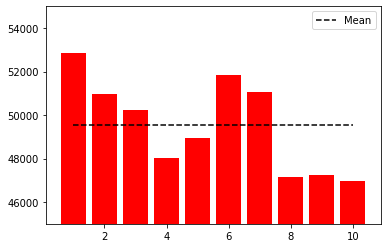

In [96]:
plt.bar(np.arange(1,11), forest_rmse_score, color = 'red')
plt.plot(np.arange(1,11), [forest_rmse_score.mean()]*len(np.arange(1,11)), linestyle = '--', label = 'Mean', color = 'black')
plt.ylim(45000, 55000)
plt.legend();

### **Fine Tuning Model**

In [98]:
# Grid Search is used to find the best combination of hyperparameters
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_features':[2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [99]:
# getting best parameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [100]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [112]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

62544.80909240848 {'max_features': 2, 'n_estimators': 3}
54938.50022408025 {'max_features': 2, 'n_estimators': 10}
52165.803180674084 {'max_features': 2, 'n_estimators': 30}
60111.89570217038 {'max_features': 4, 'n_estimators': 3}
52320.30958733276 {'max_features': 4, 'n_estimators': 10}
50049.27513532971 {'max_features': 4, 'n_estimators': 30}
57923.59625541294 {'max_features': 6, 'n_estimators': 3}
51563.342592195586 {'max_features': 6, 'n_estimators': 10}
49371.553629406284 {'max_features': 6, 'n_estimators': 30}
58134.774411925 {'max_features': 8, 'n_estimators': 3}
51989.15212189445 {'max_features': 8, 'n_estimators': 10}
49770.79874889745 {'max_features': 8, 'n_estimators': 30}
61319.278241763874 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53806.75163694439 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59478.9414851077 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51644.32204941384 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [118]:
# How to extract from dictionary !!! Pending
cvres['params'][0]['max_features']

2

In [130]:
feature_importance = grid_search.best_estimator_.feature_importances_
extra_attrbs = ['rooms_per_household', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attrbs = list(cat_encoder.categories_[0])
attributes = num_attrb + extra_attrbs + cat_one_hot_attrbs
sorted(zip(feature_importance, attributes), reverse = True)

[(0.33165958333196766, 'median_income'),
 (0.13584906730376856, 'INLAND'),
 (0.10254994836975768, 'pop_per_hhold'),
 (0.07896589402385325, 'longitude'),
 (0.07473773499629546, 'latitude'),
 (0.06997751964211398, 'bedrooms_per_room'),
 (0.0670529060632067, 'rooms_per_household'),
 (0.04161452227343514, 'housing_median_age'),
 (0.01791051777703809, 'population'),
 (0.017113787514032086, 'total_bedrooms'),
 (0.016548414690994512, 'total_rooms'),
 (0.016410000317670728, 'households'),
 (0.014699974072050596, '<1H OCEAN'),
 (0.00812722746262411, 'NEAR OCEAN'),
 (0.006525158358541139, 'NEAR BAY'),
 (0.0002577438026503409, 'ISLAND')]

### **Test Set**

In [134]:
final_model = grid_search.best_estimator_
X_test = strat_test.drop('median_house_value', axis = 1)
y_test = strat_test['median_house_value'].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predications = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predications)
final_rmse = np.sqrt(final_mse)

In [136]:
final_rmse

50196.4668941241

In [138]:
# 95 % confidence
from scipy import stats
confidence = 0.95
squared_errors = (final_predications - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([47628.46801992, 52639.33521029])